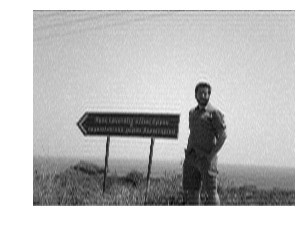

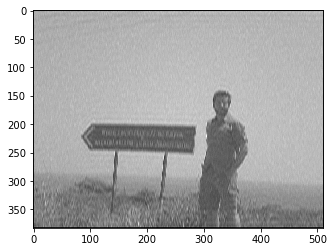

In [131]:
from scipy import fftpack,misc

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

im=Image.open("degraded.png")
im_fft = fftpack.fft2(im)

nrows1,ncols1 = im_new.shape
G = np.zeros(im_new.shape)
F = np.zeros(im_new.shape)
F1 = np.zeros(im_new.shape)

from scipy import ndimage


blurred_f = ndimage.gaussian_filter(im_new, 5)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(im_new, cmap=plt.cm.gray)
plt.axis('off')
misc.imsave("final.png",im_new)

plt.tight_layout()
plt.show()

for i in range(1,nrows1-1):
    for j in range(1,ncols1-1):
        G[i][j] = 5*im_new[i][j] - im_new[i+1][j] - im_new[i-1][j] - im_new[i][j+1]-im_new[i][j-1]

for i in range(0,nrows1):
    for j in range(0,ncols1):
        F[i][j] = im_new[i][j] - G[i][j]

for i in range(0,nrows1):
    for j in range(0,ncols1):
        F1[i][j] = im_new[i][j] - 0.4*F[i][j]
    
misc.imsave("final0.png",F1)
plt.imshow(F1, plt.cm.gray) 
plt.show()       
